### Task Structured Tabular Data:

#### Dataset Link:
Dataset can be found at " /data/structured_data/data.csv " in the respective challenge's repo.

#### Description:
Tabular data is usually given in csv format (comma-separated-value). CSV files can be read and manipulated using pandas and numpy library in python. Most common datatypes in structured data are 'numerical' and 'categorical' data. Data processing is required to handle missing values, inconsistent string formats, missing commas, categorical variables and other different kinds of data inadequacies that you will get to experience in this course. 

#### Objective:
How to process and manipulate basic structured data for machine learning (Check out helpful links section to get hints)

#### Tasks:
- Load the csv file (pandas.read_csv function)
- Classify columns into two groups - numerical and categorical. Print column names for each group.
- Print first 10 rows after handling missing values
- One-Hot encode the categorical data
- Standarize or normalize the numerical columns

#### Ask yourself:

- Why do we need feature encoding and scaling techniques?
- What is ordinal data and should we one-hot encode ordinal data? Are any better ways to encode it?
- What's the difference between normalization and standardization? Which technique is most suitable for this sample dataset?
- Can you solve the level-up challenge: Complete all the above tasks without using scikit-learn library ?

#### Helpful Links:
- Nice introduction to handle missing values: https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/
- Scikit-learn documentation for one hot encoding: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- Difference between normalization and standardization: https://medium.com/towards-artificial-intelligence/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [ ]:
# Import the required libraries
# Use terminal commands like "pip install numpy" to install packages
import numpy as np
import pandas as pd
# import sklearn if and when required
#import sklearn as sl
from io import StringIO

from sklearn import preprocessing
import matplotlib.pyplot as plt


In [ ]:
#@title TASK 1 - reading csv using pandas 



In [ ]:
df = pd.read_csv('data.csv')
df

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.0,72000.0,No,1
1,Spain,27.0,48000.0,Yes,1
2,Germany,30.0,54000.0,No,2
3,Spain,38.0,61000.0,No,3
4,Germany,40.0,NaN,Yes,1
5,France,35.0,58000.0,Yes,2
6,Spain,NaN,52000.0,No,3
7,France,48.0,79000.0,Yes,1
8,Germany,50.0,83000.0,No,2
9,France,37.0,67000.0,Yes,2


In [ ]:
#@title TASK 2 - Categorical and Numerical Dtypes classification

In [ ]:
for i in df:
  print(i)

Country
Age
Salary
Purchased
Price Category Of Purchase


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     20 non-null     object 
 1   Age                         18 non-null     float64
 2   Salary                      17 non-null     float64
 3   Purchased                   20 non-null     object 
 4   Price Category Of Purchase  20 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 928.0+ bytes


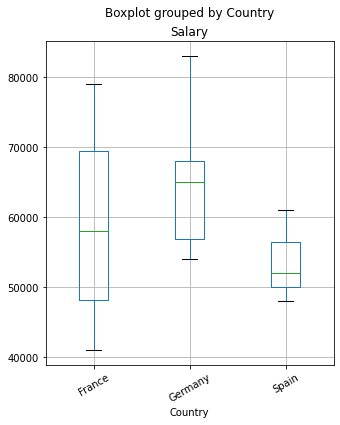

In [ ]:
#df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

df.boxplot('Salary','Country',rot = 30,figsize=(5,6))

In [ ]:
dfCategorical = df.select_dtypes(include=['object']).copy()
dfNumerical = df.select_dtypes(exclude=['object']).copy()

print("CATEGORICAL COLOUMNS")
dfCategorical


CATEGORICAL COLOUMNS


,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes
5,France,Yes
6,Spain,No
7,France,Yes
8,Germany,No
9,France,Yes


In [ ]:

print("NUMERICAL COLOUMNS")
dfNumerical

NUMERICAL COLOUMNS


,Age,Salary,Price Category Of Purchase
0,44.0,72000.0,1
1,27.0,48000.0,1
2,30.0,54000.0,2
3,38.0,61000.0,3
4,40.0,NaN,1
5,35.0,58000.0,2
6,NaN,52000.0,3
7,48.0,79000.0,1
8,50.0,83000.0,2
9,37.0,67000.0,2


In [ ]:
#@title TASK 3 - Print first 10 rows after handling missing values

In [ ]:
#coloumn wise null values
print(df.isnull().values.sum())
print(df.isnull().sum())

5
Country                       0
Age                           2
Salary                        3
Purchased                     0
Price Category Of Purchase    0
dtype: int64


In [ ]:
df.head(10)

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.0,72000.0,No,1
1,Spain,27.0,48000.0,Yes,1
2,Germany,30.0,54000.0,No,2
3,Spain,38.0,61000.0,No,3
4,Germany,40.0,NaN,Yes,1
5,France,35.0,58000.0,Yes,2
6,Spain,NaN,52000.0,No,3
7,France,48.0,79000.0,Yes,1
8,Germany,50.0,83000.0,No,2
9,France,37.0,67000.0,Yes,2


In [ ]:
# using replace function to mode imputation for NULL values .. replace by mean 
# df["Age"].fillna(df["Age"].mean())
# df["Salary"].fillna(df["Salary"].mode())

#df['Age'].mean()

df['Age'] = df['Age'].replace(np.NaN,df['Age'].mean())

df['Salary'] = df['Salary'].replace(np.NaN, df['Salary'].mean())


In [ ]:
print(df.isnull().values.sum())
print(df.isnull().sum())

0
Country                       0
Age                           0
Salary                        0
Purchased                     0
Price Category Of Purchase    0
dtype: int64


In [ ]:
df.head(10)

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.000000,72000.000000,No,1
1,Spain,27.000000,48000.000000,Yes,1
2,Germany,30.000000,54000.000000,No,2
3,Spain,38.000000,61000.000000,No,3
4,Germany,40.000000,60364.705882,Yes,1
5,France,35.000000,58000.000000,Yes,2
6,Spain,34.222222,52000.000000,No,3
7,France,48.000000,79000.000000,Yes,1
8,Germany,50.000000,83000.000000,No,2
9,France,37.000000,67000.000000,Yes,2


In [ ]:
#@title TASK 4 - Encoding categorical data

In [ ]:
#Using dict and replace() function 
#is useful when the coloumn has low categories.
#ex. for Country coloumn : 3 categories and Purchased coloumn : 2 categories

replace_map_Country = {'Country': {'France': 1, 'Spain': 2, 'Germany': 3}}
replace_map_Pur = {'Purchased': {'No': 1, 'Yes': 2}}

In [ ]:
df.replace(replace_map_Country, inplace=True)
df.replace(replace_map_Pur, inplace=True)

In [ ]:
df

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,1,44.000000,72000.000000,1,1
1,2,27.000000,48000.000000,2,1
2,3,30.000000,54000.000000,1,2
3,2,38.000000,61000.000000,1,3
4,3,40.000000,60364.705882,2,1
5,1,35.000000,58000.000000,2,2
6,2,34.222222,52000.000000,1,3
7,1,48.000000,79000.000000,2,1
8,3,50.000000,83000.000000,1,2
9,1,37.000000,67000.000000,2,2


In [ ]:
#@title TASK 5 - Normalizing the data

In [ ]:
scaler = preprocessing.StandardScaler()

# names = ['Salary','Age']

# scaled_df = scaler.fit_transform(df)

# scaled_df = pd.DataFrame(scaled_df, columns=names)

x_array = np.array(df['Salary'])
normalized_X = preprocessing.normalize([x_array])

y_array = np.array(df['Age'])

normalized_Y = preprocessing.normalize([y_array])

In [ ]:
normalized_X

array([[0.26272212, 0.17514808, 0.19704159, 0.22258402, 0.22026588,
        0.21163727, 0.18974376, 0.28826455, 0.30286023, 0.24447753,
        0.19850116, 0.20069051, 0.2145564 , 0.15325457, 0.14960565,
        0.25177537, 0.24447753, 0.23717969, 0.22026588, 0.22026588]])

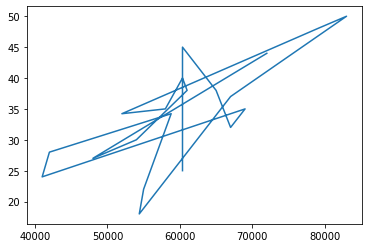

In [ ]:
plt.plot(df['Salary'],df['Age'])


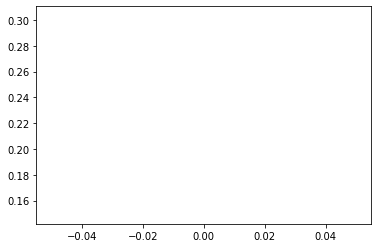

In [ ]:
plt.plot(normalized_X)